In [19]:
#Cargar las librerias necesrias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import LinearRegression -> Librería para Regresión Lineal
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
#cargamos el dataset y muestra las primeras filas
Datos = pd.read_csv('./Titanic.csv')

In [21]:
# Realizamos lectura de los Datos para el análisis exploratorio
Datos.head(40)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [22]:
sex_ = {'male':1,'female':0}

In [23]:
Datos['Sex']= Datos['Sex'].map(sex_)

In [24]:
Datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [25]:
# Filtrar columnas del modelo 

Datos = Datos[["PassengerId","Survived","Sex"]]

In [26]:
# Revisión de los datos de las variables objetivo

Datos.head(10)

,PassengerId,Survived,Sex
0,1,0,1
1,2,1,0
2,3,1,0
3,4,1,0
4,5,0,1
5,6,0,1
6,7,0,1
7,8,0,1
8,9,1,0
9,10,1,0


In [27]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Sex          891 non-null    int64
dtypes: int64(3)
memory usage: 21.0 KB


In [28]:
#caracteristica de interes-sobrevivientes
# Total de personas que sobrevivieron

Datos['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [29]:
Datos[['Survived']].head(40)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


In [30]:
# Dividir el dataset en tes y train para evaluar correctamente el modelo
# Porcentaje de datos para entrenamiento (train) = 75% , y para prueba (test) = 25%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = Datos.drop('Survived',axis=1) # Se cargan los datos de train sin los datos de la columna sobreviviente 
Y = Datos['Survived'] # Se cargan los datos de train con los datos de la la columna sobreviviente

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [31]:
print (X_train)

     PassengerId  Sex
671          672    1
417          418    0
634          635    0
323          324    0
379          380    1
..           ...  ...
131          132    1
490          491    1
528          529    1
48            49    1
80            81    1

[668 rows x 2 columns]


In [32]:
print (Y_train)

671    0
417    1
634    0
323    1
379    0
      ..
131    0
490    0
528    0
48     0
80     0
Name: Survived, Length: 668, dtype: int64


In [33]:
#entrenar el modelo configurando los diferentes hiperparametros
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [34]:
print (Y_test)

288    1
869    1
182    0
684    0
599    1
      ..
882    0
434    0
304    0
500    0
633    0
Name: Survived, Length: 223, dtype: int64


In [35]:
print (Prediccion)

[0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0
 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0
 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0
 0]


In [36]:
#Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       137
           1       0.72      0.66      0.69        86

    accuracy                           0.77       223
   macro avg       0.76      0.75      0.75       223
weighted avg       0.77      0.77      0.77       223



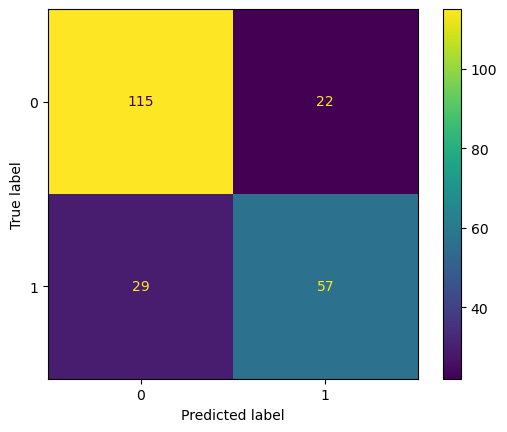

In [37]:
#Realizar las diferentes gráficas que permitan visualizar los resultados del modelo
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

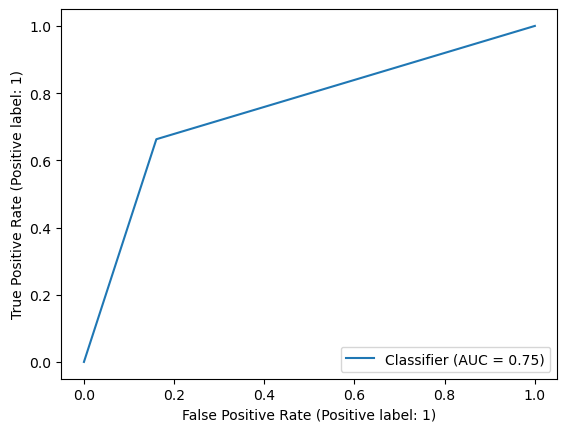

In [38]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

In [ ]:
#Interpretación de resultados
#En la evaluación de desempeño del modelo logístico se puede analizar que: 
#Precisión: mide la exactitud de los resultados, la proximidad al valor verdadero o conocido.
 #En este ejercicio, los resultados entre si se aproximan en un 0.72. Lo que significa que para la variable condición el 72% de los predichos que sobrevivieron, si sobrevivieron.
#Recall: interpreta la proporción de los valores positivos reales predichos correctamente, para la variable condición es de 0.66, identificando correctamente el 66% de las personas que sobrevivieron
#F1-score: combina las métricas anteriores para dar un único resultado, en este caso es de 0.69 indicando una puntuación aceptable 
#En la matriz de confusión se puede decir que: 
#Verdaderos negativos: recuento de observaciones predichas correctamente como falso 115 
#Verdaderos positivos: recuento de observaciones predichas correctamente como verdadero 57
#Falsos positivos: recuento de observaciones predichas incorrecta mente como verdadero 22    
#Falsos negativos: recuento de observaciones predichas incorrecta mente como falso 29
